In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('TLKM.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-28,835.0,835.0,825.0,825.0,485.287933,90095000.0
1,2004-09-29,825.0,825.0,810.0,825.0,485.287933,29370000.0
2,2004-09-30,825.0,830.0,825.0,830.0,488.228973,42927500.0
3,2004-10-01,830.0,845.0,825.0,840.0,494.111267,108387500.0
4,2004-10-04,845.0,880.0,845.0,870.0,511.758270,424210000.0


In [164]:
df = df[['Date', 'Close']]

In [165]:
df.Date

0       2004-09-28
1       2004-09-29
2       2004-09-30
3       2004-10-01
4       2004-10-04
           ...    
4562    2023-02-16
4563    2023-02-17
4564    2023-02-20
4565    2023-02-21
4566    2023-02-22
Name: Date, Length: 4567, dtype: object

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4567 entries, 0 to 4566
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4567 non-null   object 
 1   Close   4566 non-null   float64
dtypes: float64(1), object(1)
memory usage: 71.5+ KB


In [167]:
df['Date'] = pd.to_datetime(df['Date'])

In [168]:
df.Date

0      2004-09-28
1      2004-09-29
2      2004-09-30
3      2004-10-01
4      2004-10-04
          ...    
4562   2023-02-16
4563   2023-02-17
4564   2023-02-20
4565   2023-02-21
4566   2023-02-22
Name: Date, Length: 4567, dtype: datetime64[ns]

In [169]:
df.set_index('Date', inplace=True)

In [170]:
df

,Close
Date,
2004-09-28,825.0
2004-09-29,825.0
2004-09-30,830.0
2004-10-01,840.0
2004-10-04,870.0
...,...
2023-02-16,3770.0
2023-02-17,3760.0
2023-02-20,3820.0


<AxesSubplot:xlabel='Date'>

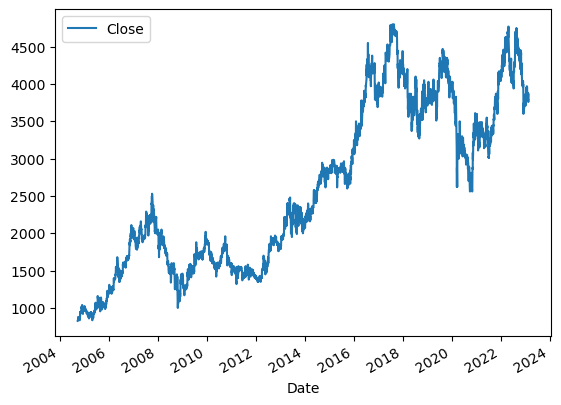

In [171]:
df.plot()
# plt.show()

In [172]:
df.shift()  # shift untuk apa?

,Close
Date,
2004-09-28,NaN
2004-09-29,825.0
2004-09-30,825.0
2004-10-01,830.0
2004-10-04,840.0
...,...
2023-02-16,3790.0
2023-02-17,3770.0
2023-02-20,3760.0


In [173]:
def shift_n(df, n):
    temp_lis = []
    for i in range(n, 0,-1):
        col_name = 'Close-' + str(i)
        temp_lis.append(df.shift(i).set_axis([col_name], axis='columns'))
        
    temp_lis.append(df)
    
    df_temp = pd.concat(temp_lis, axis=1).dropna()
    
    return df_temp

In [174]:
df2 = shift_n(df, 3)

In [175]:
df2

,Close-3,Close-2,Close-1,Close
Date,,,,
2004-10-01,825.0,825.0,830.0,840.0
2004-10-04,825.0,830.0,840.0,870.0
2004-10-05,830.0,840.0,870.0,880.0
2004-10-06,840.0,870.0,880.0,860.0
2004-10-07,870.0,880.0,860.0,855.0
...,...,...,...,...
2023-02-16,3790.0,3800.0,3790.0,3770.0
2023-02-17,3800.0,3790.0,3770.0,3760.0
2023-02-20,3790.0,3770.0,3760.0,3820.0


In [178]:
arr = df2.reset_index().to_numpy()
arr

array([[Timestamp('2004-10-01 00:00:00'), 825.0, 825.0, 830.0, 840.0],
       [Timestamp('2004-10-04 00:00:00'), 825.0, 830.0, 840.0, 870.0],
       [Timestamp('2004-10-05 00:00:00'), 830.0, 840.0, 870.0, 880.0],
       ...,
       [Timestamp('2023-02-20 00:00:00'), 3790.0, 3770.0, 3760.0, 3820.0],
       [Timestamp('2023-02-21 00:00:00'), 3770.0, 3760.0, 3820.0, 3840.0],
       [Timestamp('2023-02-22 00:00:00'), 3760.0, 3820.0, 3840.0, 3860.0]],
      dtype=object)

In [179]:
dates = arr[:, 0]
dates

array([Timestamp('2004-10-01 00:00:00'), Timestamp('2004-10-04 00:00:00'),
       Timestamp('2004-10-05 00:00:00'), ...,
       Timestamp('2023-02-20 00:00:00'), Timestamp('2023-02-21 00:00:00'),
       Timestamp('2023-02-22 00:00:00')], dtype=object)

In [187]:
X = arr[:, 1:-1]
X = X.astype(np.float32)

In [188]:
X.reshape(X.shape[0], X.shape[1], 1)

array([[[ 825.],
        [ 825.],
        [ 830.]],

       [[ 825.],
        [ 830.],
        [ 840.]],

       [[ 830.],
        [ 840.],
        [ 870.]],

       ...,

       [[3790.],
        [3770.],
        [3760.]],

       [[3770.],
        [3760.],
        [3820.]],

       [[3760.],
        [3820.],
        [3840.]]], dtype=float32)

In [189]:
y = arr[:, -1]
y = y.astype(np.float32)

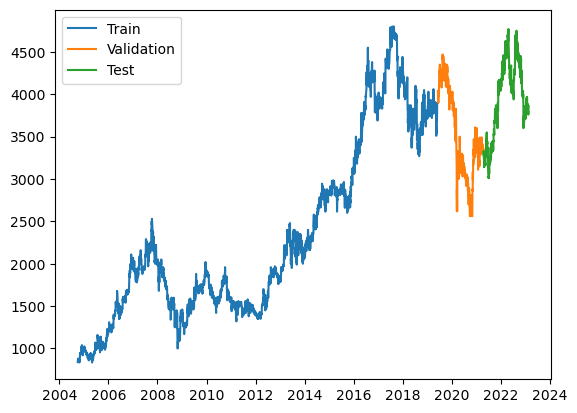

In [190]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80 : q_90], X[q_80 : q_90], y[q_80 : q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [191]:
import tensorflow as tf
from tensorflow.keras import layers

In [195]:
model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam(),
                  metrics='mean_squared_error')
# norm_model.fit(features, labels, epochs=10)

In [196]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
114/114 [==============================] - 1s 879us/step - loss: 761778.5000 - mean_squared_error: 761778.5000
Epoch 2/100
114/114 [==============================] - 0s 811us/step - loss: 3499.7834 - mean_squared_error: 3499.7834
Epoch 3/100
114/114 [==============================] - 0s 2ms/step - loss: 3480.6917 - mean_squared_error: 3480.6917
Epoch 4/100
114/114 [==============================] - 0s 933us/step - loss: 3470.4917 - mean_squared_error: 3470.4917
Epoch 5/100
114/114 [==============================] - 0s 802us/step - loss: 3487.0134 - mean_squared_error: 3487.0134
Epoch 6/100
114/114 [==============================] - 0s 860us/step - loss: 3446.3455 - mean_squared_error: 3446.3455
Epoch 7/100
114/114 [==============================] - 0s 824us/step - loss: 3457.1611 - mean_squared_error: 3457.1611
Epoch 8/100
114/114 [==============================] - 0s 887us/step - loss: 3439.9575 - mean_squared_error: 3439.9575
Epoch 9/100
114/114 [=========================

114/114 [==============================] - 0s 1ms/step - loss: 2401.9636 - mean_squared_error: 2401.9636
Epoch 70/100
114/114 [==============================] - 0s 1ms/step - loss: 2271.5474 - mean_squared_error: 2271.5474
Epoch 71/100
114/114 [==============================] - 0s 1ms/step - loss: 2334.1926 - mean_squared_error: 2334.1926
Epoch 72/100
114/114 [==============================] - 0s 1ms/step - loss: 2197.6243 - mean_squared_error: 2197.6243
Epoch 73/100
114/114 [==============================] - 0s 1ms/step - loss: 2277.5686 - mean_squared_error: 2277.5686
Epoch 74/100
114/114 [==============================] - 0s 1ms/step - loss: 2283.5720 - mean_squared_error: 2283.5720
Epoch 75/100
114/114 [==============================] - 0s 823us/step - loss: 2283.0613 - mean_squared_error: 2283.0613
Epoch 76/100
114/114 [==============================] - 0s 857us/step - loss: 2747.0117 - mean_squared_error: 2747.0117
Epoch 77/100
114/114 [==============================] - 0s 1ms/st

114/114 [==============================] - 1s 780us/step


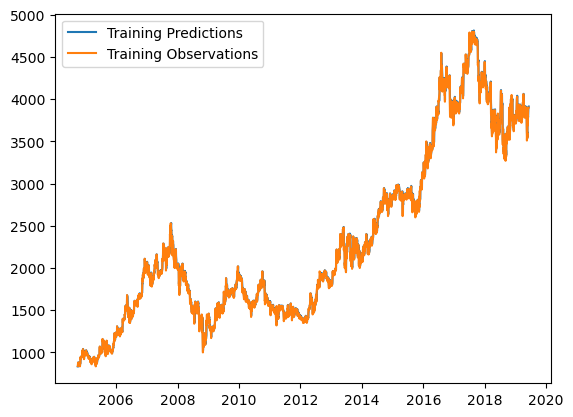

In [197]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

15/15 [==============================] - 0s 1ms/step


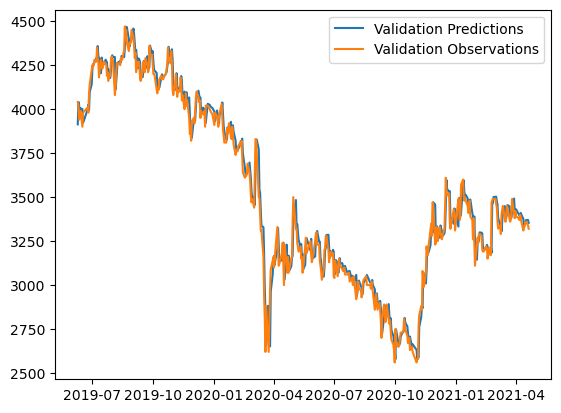

In [198]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

15/15 [==============================] - 0s 887us/step


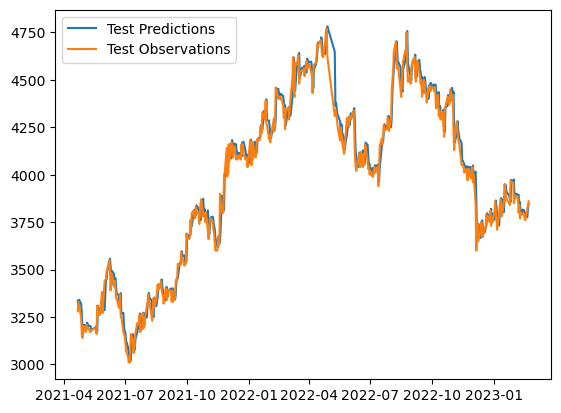

In [199]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])
plt.show()

In [204]:
model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='softmax'),
  layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam(),
                  metrics='mean_squared_error')
# norm_model.fit(features, labels, epochs=10)

In [205]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
114/114 [==============================] - 1s 1ms/step - loss: 6464535.5000 - mean_squared_error: 6464535.5000
Epoch 2/100
114/114 [==============================] - 0s 857us/step - loss: 6463456.5000 - mean_squared_error: 6463456.5000
Epoch 3/100
114/114 [==============================] - 0s 858us/step - loss: 6462398.0000 - mean_squared_error: 6462398.0000
Epoch 4/100
114/114 [==============================] - 0s 859us/step - loss: 6461345.0000 - mean_squared_error: 6461345.0000
Epoch 5/100
114/114 [==============================] - 0s 865us/step - loss: 6460289.0000 - mean_squared_error: 6460289.0000
Epoch 6/100
114/114 [==============================] - 0s 858us/step - loss: 6459234.0000 - mean_squared_error: 6459234.0000
Epoch 7/100
114/114 [==============================] - 0s 867us/step - loss: 6458181.5000 - mean_squared_error: 6458181.5000
Epoch 8/100
114/114 [==============================] - 0s 904us/step - loss: 6457126.5000 - mean_squared_error: 6457126.5000
Ep

114/114 [==============================] - 0s 787us/step - loss: 6396258.0000 - mean_squared_error: 6396258.0000
Epoch 67/100
114/114 [==============================] - 0s 827us/step - loss: 6395214.0000 - mean_squared_error: 6395214.0000
Epoch 68/100
114/114 [==============================] - 0s 1ms/step - loss: 6394165.0000 - mean_squared_error: 6394165.0000
Epoch 69/100
114/114 [==============================] - 0s 1ms/step - loss: 6393120.5000 - mean_squared_error: 6393120.5000
Epoch 70/100
114/114 [==============================] - 0s 1ms/step - loss: 6392072.5000 - mean_squared_error: 6392072.5000
Epoch 71/100
114/114 [==============================] - 0s 1ms/step - loss: 6391027.0000 - mean_squared_error: 6391027.0000
Epoch 72/100
114/114 [==============================] - 0s 936us/step - loss: 6389980.5000 - mean_squared_error: 6389980.5000
Epoch 73/100
114/114 [==============================] - 0s 786us/step - loss: 6388936.0000 - mean_squared_error: 6388936.0000
Epoch 74/100
